In [ ]:
# 🏎️ Race Strategy Hub – Interactive Simulation

Welcome to my personal sandbox for exploring Formula 1 race strategy.
This notebook started as a simple lap time sim and gradually evolved into a multi-pane dashboard.
It’s part experiment, part dev log, and part visualization tool.

### What you’ll find here:
- Interactive sliders for laps, pit stops, tire wear, and fuel load
- Multi-stop strategy support with stint shading and pit markers
- Side-by-side panels for **Lap Times**, **Fuel Load**, and **Tire Degradation**
- A running history of earlier prototypes (so you can see how the hub grew)

### Requirements
```bash
pip install numpy matplotlib ipywidgets


0-stop -> total race time: 1406.20s | pit stops at laps []
1-stop -> total race time: 1395.90s | pit stops at laps [10]
2-stop -> total race time: 1404.98s | pit stops at laps [7, 14]


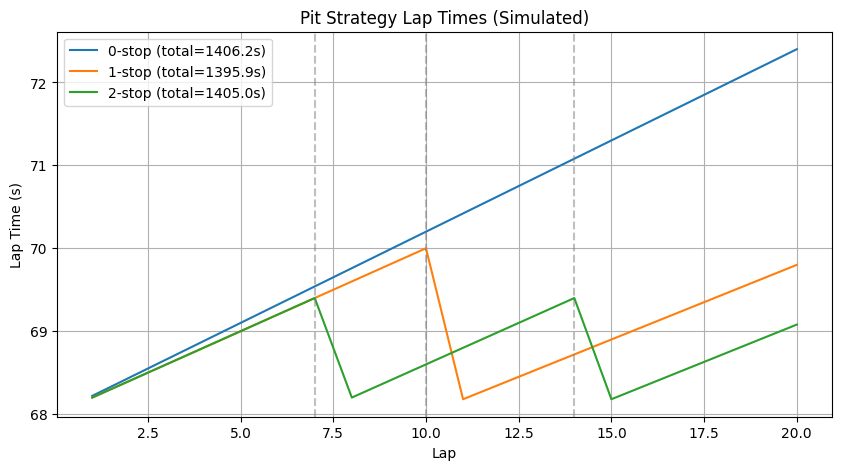

In [1]:
# Module 4: Lists, Tuples, and For Loops
# Mini Pit Strategy Simulator (with plotting + pit stop markers)

import matplotlib.pyplot as plt

# ----- CONFIG -----
total_laps = 68
base_lap = 68.0
wear_per_lap = 0.2
pit_loss = 15.0

plan_0_stop = [20]
plan_1_stop = [10, 10]
plan_2_stop = [7, 7, 6]

wear_0 = [1.1]
wear_1 = [1.0, 0.9]
wear_2 = [1.0, 1.0, 0.9]
# ------------------

def simulate(stints, wears, name):
    total_time = 0.0
    lap_counter = 0
    lap_times = []  # list of tuples: (lap_number, lap_time)
    pit_laps = []   # list of lap numbers where pit stops happen

    for stint_index in range(len(stints)):
        stint_length = stints[stint_index]
        wear_mult = wears[stint_index]

        for lap_in_stint in range(1, stint_length + 1):
            lap_counter += 1
            lap_time = base_lap + wear_per_lap * wear_mult * lap_in_stint
            total_time += lap_time
            lap_times.append((lap_counter, lap_time))

        if stint_index < len(stints) - 1:
            total_time += pit_loss
            pit_laps.append(lap_counter)  # pit happens after this lap

    return total_time, lap_times, pit_laps

# Run sims
results = []
plans = [
    ("0-stop", plan_0_stop, wear_0),
    ("1-stop", plan_1_stop, wear_1),
    ("2-stop", plan_2_stop, wear_2),
]

for name, stints, wears in plans:
    total, laps, pit_laps = simulate(stints, wears, name)
    results.append((name, total, laps, pit_laps))

# Print results
for name, total, laps, pit_laps in results:
    print(f"{name} -> total race time: {total:.2f}s | pit stops at laps {pit_laps}")

# Plot lap times with pit stop markers
plt.figure(figsize=(10, 5))
for name, total, laps, pit_laps in results:
    lap_nums = [lap for lap, _ in laps]
    lap_times = [t for _, t in laps]
    plt.plot(lap_nums, lap_times, label=f"{name} (total={total:.1f}s)")

    # Add vertical pit-stop lines
    for pit in pit_laps:
        plt.axvline(x=pit, color="gray", linestyle="--", alpha=0.5)

plt.title("Pit Strategy Lap Times (Simulated)")
plt.xlabel("Lap")
plt.ylabel("Lap Time (s)")
plt.legend()
plt.grid(True)
plt.show()
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def race_sim(laps=50, pit_lap=25, base_pace=85.0, tyre_deg=0.05, pit_loss=20):
    x = np.arange(1, laps+1)
    lap_times = base_pace + tyre_deg * (x - 1)

    # pit penalty
    lap_times[pit_lap-1:] += pit_loss

    # plot
    plt.figure(figsize=(10,5))
    plt.plot(x, lap_times, label="Lap Times")
    plt.xlabel("Lap")
    plt.ylabel("Lap Time (s)")
    plt.title("Race Strategy Sim")
    plt.legend()
    plt.show()

    print(f"Pit on lap {pit_lap}: total race time = {lap_times.sum():.1f} s")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def race_sim(laps=50, pit_lap=25, base_pace=85.0, tyre_deg=0.05, pit_loss=20):
    x = np.arange(1, laps+1)
    lap_times = base_pace + tyre_deg * (x - 1)

    # pit penalty
    lap_times[pit_lap-1:] += pit_loss

    # plot
    plt.figure(figsize=(10,5))
    plt.plot(x, lap_times, label="Lap Times")
    plt.xlabel("Lap")
    plt.ylabel("Lap Time (s)")
    plt.title("Race Strategy Sim")
    plt.legend()
    plt.show()

    print(f"Pit on lap {pit_lap}: total race time = {lap_times.sum():.1f} s")

interact(race_sim,
         laps=widgets.IntSlider(min=10,max=80,step=1,value=50),
         pit_lap=widgets.IntSlider(min=1,max=79,step=1,value=25),
         base_pace=widgets.FloatSlider(min=70,max=100,step=0.5,value=85.0),
         tyre_deg=widgets.FloatSlider(min=0.01,max=0.2,step=0.01,value=0.05),
         pit_loss=widgets.IntSlider(min=5,max=30,step=1,value=20));


interactive(children=(IntSlider(value=50, description='laps', max=80, min=10), IntSlider(value=25, description…

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def mini_hub_multi(laps=50, pit_laps="25,45", base_pace=85.0, tyre_deg=0.05, pit_loss=20, fuel_load=100):
    x = np.arange(1, laps+1)

    # Convert pit_laps string to sorted list of ints
    pit_list = sorted([int(p.strip()) for p in pit_laps.split(",") if p.strip().isdigit() and 1 <= int(p.strip()) <= laps])

    # Lap time model
    lap_times = base_pace + tyre_deg * (x - 1)
    for p in pit_list:
        lap_times[p-1:] += pit_loss

    # Fuel model
    fuel_per_lap = fuel_load / laps
    fuel_remaining = fuel_load - fuel_per_lap * (x - 1)

    # Tire degradation (cumulative added time)
    tyre_wear_curve = tyre_deg * (x - 1)

    # Side-by-side plots
    fig, axs = plt.subplots(1, 3, figsize=(18,5))

    # Helper to shade stints
    def shade_stints(ax):
        # start at lap 1, end at each pit stop
        stint_starts = [1] + pit_list
        stint_ends = pit_list + [laps]
        colors = ["lightblue", "lightgray", "lightgreen", "lavender", "mistyrose"]

        for i, (s,e) in enumerate(zip(stint_starts, stint_ends)):
            ax.axvspan(s, e, color=colors[i % len(colors)], alpha=0.2, label=f"Stint {i+1}")
        for p in pit_list:
            ax.axvline(p, color="red", linestyle="--")

    # Lap times panel
    axs[0].plot(x, lap_times, label="Lap Time (s)", color="blue")
    shade_stints(axs[0])
    axs[0].set_title("Lap Times")
    axs[0].set_xlabel("Lap")
    axs[0].set_ylabel("Seconds")
    axs[0].legend()

    # Fuel panel
    axs[1].plot(x, fuel_remaining, label="Fuel (kg)", color="orange")
    shade_stints(axs[1])
    axs[1].set_title("Fuel Load")
    axs[1].set_xlabel("Lap")
    axs[1].set_ylabel("Kg")
    axs[1].legend()

    # Tire panel
    axs[2].plot(x, tyre_wear_curve, label="Added Time (s)", color="green")
    shade_stints(axs[2])
    axs[2].set_title("Tire Degradation")
    axs[2].set_xlabel("Lap")
    axs[2].set_ylabel("Cumulative Slowdown (s)")
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    # Quick summary
    print(f"Pits at: {pit_list if pit_list else 'No stops'}")
    print(f"Total race time = {lap_times.sum():.1f} s")
    print(f"Start fuel: {fuel_load} kg, burn rate = {fuel_per_lap:.2f} kg/lap")
    print(f"Total tire drop-off by lap {laps}: +{tyre_wear_curve[-1]:.2f} s")

# Widget controls
interact(mini_hub_multi,
         laps=widgets.IntSlider(min=10,max=80,step=1,value=50),
         pit_laps=widgets.Text(value="25,45", description="Pit Laps (comma sep)"),
         base_pace=widgets.FloatSlider(min=70,max=100,step=0.5,value=85.0),
         tyre_deg=widgets.FloatSlider(min=0.01,max=0.2,step=0.01,value=0.05),
         pit_loss=widgets.IntSlider(min=5,max=30,step=1,value=20),
         fuel_load=widgets.IntSlider(min=50,max=150,step=5,value=100));


interactive(children=(IntSlider(value=50, description='laps', max=80, min=10), Text(value='25,45', description…

# New Section